<a href="https://colab.research.google.com/github/Ruthuja-Gaikwad/SDN_DDoS_Ensemble_ML/blob/main/cicids_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/UDPLag_data_2_0_per.csv")
df.head()

In [ ]:
df.drop(columns=['Flow ID'], inplace=True)

In [ ]:
print("Datatype of Dataframe i.e. Pandas Dataframe: ", type(df))
print("Datatype of Column i.e. Pandas Series: ", type(df.iloc[:, 1]))
df.head()

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

In [ ]:
import numpy as np

In [ ]:
indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)

In [ ]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df


In [ ]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df

# Assuming 'df' is your original DataFrame
df_cleaned = clean_dataset(df.copy()) # Create df_cleaned by calling the function

# Resetting the index and dropping the 'index' column
df_cleaned = df_cleaned.reset_index(drop=True)

# Checking if 'Flow ID' column exists before dropping
if 'Flow ID' in df_cleaned.columns:
    df_cleaned.drop('Flow ID', axis=1, inplace=True)

df_cleaned

In [ ]:
df.columns.tolist()

In [ ]:
# Saving the label attribute before dropping it.
df_labels = df_cleaned['label']
# Shows all the possible labels/ classes a model can predict.
# Need to alter these to numeric 0, 1, etc... for model comprehension (e.g. pd.get_dummies()).
df_labels.unique()

In [ ]:
# Axis=1 means columns. Axis=0 means rows. inplace=False means that the original 'df' isn't altered.
df_no_labels = df_cleaned.drop('label', axis=1, inplace=False)
# Getting feature names for the StandardScaler process
df_features = df_no_labels.columns.tolist()
# Printing out Dataframe with no label column, to show successful dropping
df_no_labels

In [ ]:
print(df_cleaned.columns)

In [ ]:
# Replace infinite values with NaN
df_no_labels.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Display initial info
print("Initial DataFrame info:")
print(df_cleaned.info())

# Identify categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
print("\nCategorical columns identified:")
print(categorical_columns)

# Drop categorical columns
df_no_labels = df_cleaned.drop(categorical_columns, axis=1)

# Convert all values to numeric, setting errors='coerce' to turn non-numeric values into NaN
df_no_labels = df_no_labels.apply(pd.to_numeric, errors='coerce')

# Print info after conversion to numeric
print("\nDataFrame info after converting to numeric:")
print(df_no_labels.info())

# Replace infinite values with NaN
df_no_labels.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any NaN values
df_no_labels = df_no_labels.dropna()

# Check if DataFrame is empty after dropping NaN values
if df_no_labels.empty:
    print("DataFrame is empty after dropping NaN values. Please check the data.")
else:
    # Display info of the DataFrame after dropping NaNs
    print("\nDataFrame info after dropping NaNs:")
    print(df_no_labels.info())

    # Handle any remaining missing values if necessary
    if df_no_labels.isnull().values.any():
        df_no_labels = df_no_labels.fillna(df_no_labels.mean())  # Example: filling with column mean

    # Standardize the numerical columns
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_no_labels), columns=df_no_labels.columns)
    print("\nScaled DataFrame:")
    print(df_scaled.head())


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # Import PCA class

# Define the number of components for PCA
dimensions_num_for_PCA = 2  # Set this to the desired number of components

pca = PCA(n_components=dimensions_num_for_PCA)
#principal_components = pca.fit(df_scaled).transform(df_scaled) => for normalised PCA

# Non-normalised PCA
principal_components = pca.fit(df_no_labels).transform(df_no_labels)
principal_components

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # Import PCA class

# Define the number of components for PCA
dimensions_num_for_PCA = 2  # Set this to the desired number of components

# Define the function to generate names for principal components
def get_PCA_feature_names(num_components):
    return ["PC" + str(i+1) for i in range(num_components)]

pca = PCA(n_components=dimensions_num_for_PCA)

# Non-normalised PCA
principal_components = pca.fit(df_no_labels).transform(df_no_labels)

principal_component_headings = get_PCA_feature_names(dimensions_num_for_PCA)
print(principal_component_headings)

In [ ]:
df_pc = pd.DataFrame(data = principal_components, columns = principal_component_headings)
df_pc

In [ ]:
df_final = pd.concat([df_pc, df_labels], axis = 1)
# Scroll to the RHS end of dataframe to see attached label feature
df_final

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer # Import LabelBinarizer

lb = LabelBinarizer()
df_final['label'] = lb.fit_transform(df_final['label'])
df_final

In [ ]:
print("Before LabelBinarizer: ", df_labels.unique())
print("After LabelBinarizer: ", df_final['label'].unique())

In [ ]:
# Separating the label so that the answers aren't provided to the model, in training.
X = df_final.drop(['label'], axis = 1)
y = df_final['label']
y

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold # Import StratifiedKFold

# Define the number of splits
num_of_splits_for_skf = 5  # Set this to your desired number of splits

skf = StratifiedKFold(n_splits=num_of_splits_for_skf, shuffle=False)
skf

In [ ]:
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    reshaped_y_train = np.asarray(y_train).reshape(-1, 1)
    reshaped_y_test = np.asarray(y_test).reshape(-1, 1)

print( 'X_train length: ', len(X_train) ) # To check if splits worked
print( 'y_train length: ', len(y_train) )
print( 'X_test length: ', len(X_test) )
print( 'y_test length: ', len(y_test) )

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Create classifiers
mlp_classifier = MLPClassifier(random_state=42)
nb_classifier = BernoulliNB()
pa_classifier = PassiveAggressiveClassifier(random_state=42)
sgd_classifier = SGDClassifier(random_state=42)

# Create a Voting Classifier with the above classifiers
voting_classifier = VotingClassifier(
    estimators=[
        ('mlp', mlp_classifier),
        ('nb', nb_classifier),
        ('pa', pa_classifier),
        ('sgd', sgd_classifier)
    ],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting based on probabilities
)

# Train all classifiers
mlp_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)
pa_classifier.fit(X_train, y_train)
sgd_classifier.fit(X_train, y_train)
voting_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_mlp = mlp_classifier.predict(X_test)
y_pred_nb = nb_classifier.predict(X_test)
y_pred_pa = pa_classifier.predict(X_test)
y_pred_sgd = sgd_classifier.predict(X_test)
y_pred_voting = voting_classifier.predict(X_test)

# Calculate metrics for each classifier
metrics_mlp = {
    'accuracy': accuracy_score(y_test, y_pred_mlp),
    'precision': precision_score(y_test, y_pred_mlp, average='weighted'),
    'recall': recall_score(y_test, y_pred_mlp, average='weighted'),
    'confusion_matrix': confusion_matrix(y_test, y_pred_mlp)
}

metrics_nb = {
    'accuracy': accuracy_score(y_test, y_pred_nb),
    'precision': precision_score(y_test, y_pred_nb, average='weighted'),
    'recall': recall_score(y_test, y_pred_nb, average='weighted'),
    'confusion_matrix': confusion_matrix(y_test, y_pred_nb)
}

metrics_pa = {
    'accuracy': accuracy_score(y_test, y_pred_pa),
    'precision': precision_score(y_test, y_pred_pa, average='weighted'),
    'recall': recall_score(y_test, y_pred_pa, average='weighted'),
    'confusion_matrix': confusion_matrix(y_test, y_pred_pa)
}

metrics_sgd = {
    'accuracy': accuracy_score(y_test, y_pred_sgd),
    'precision': precision_score(y_test, y_pred_sgd, average='weighted'),
    'recall': recall_score(y_test, y_pred_sgd, average='weighted'),
    'confusion_matrix': confusion_matrix(y_test, y_pred_sgd)
}

metrics_voting = {
    'accuracy': accuracy_score(y_test, y_pred_voting),
    'precision': precision_score(y_test, y_pred_voting, average='weighted'),
    'recall': recall_score(y_test, y_pred_voting, average='weighted'),
    'confusion_matrix': confusion_matrix(y_test, y_pred_voting)
}

# Print metrics for each classifier
print("MLP Classifier Metrics:")
print(metrics_mlp)

print("\nBernoulli Naive Bayes Metrics:")
print(metrics_nb)

print("\nPassive Aggressive Classifier Metrics:")
print(metrics_pa)

print("\nStochastic Gradient Descent (SGD) Classifier Metrics:")
print(metrics_sgd)

print("\nEnsemble Model (Voting Classifier) Metrics:")
print(metrics_voting)


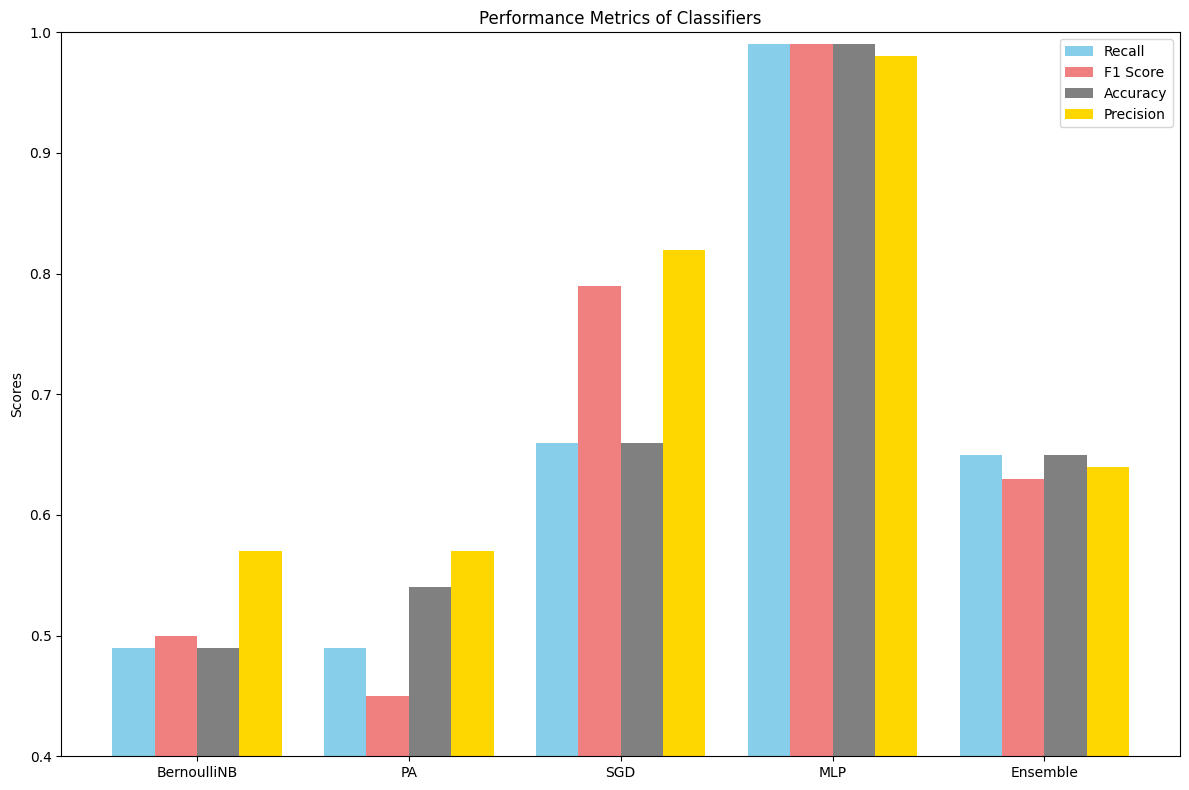

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
classifiers = ['BernoulliNB', 'PA', 'SGD', 'MLP', 'Ensemble']
recall_scores = [0.49, 0.49, 0.66, 0.99, 0.65]
f1_scores = [0.50, 0.45, 0.79, 0.99, 0.63]
accuracy_scores = [0.49, 0.54, 0.66, 0.99, 0.65]
precision_scores = [0.57, 0.57, 0.82, 0.98, 0.64]

x = np.arange(len(classifiers))

# Plot Recall Performance
plt.figure(figsize=(12, 8))
bar_width = 0.2

plt.bar(x - 1.5 * bar_width, recall_scores, width=bar_width, color='skyblue', label='Recall')
plt.bar(x - 0.5 * bar_width, f1_scores, width=bar_width, color='lightcoral', label='F1 Score')
plt.bar(x + 0.5 * bar_width, accuracy_scores, width=bar_width, color='gray', label='Accuracy')
plt.bar(x + 1.5 * bar_width, precision_scores, width=bar_width, color='gold', label='Precision')

plt.xticks(x, classifiers)
plt.ylim(0.4, 1.0)
plt.ylabel('Scores')
plt.title('Performance Metrics of Classifiers')
plt.legend()
plt.tight_layout()

plt.savefig('Performance_Metrics.png')
plt.show()
